In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_context("poster")
plt.style.use('seaborn')

import pandas as pd
import numpy as np

C:\Users\baigs\AppData\Local\Temp\ipykernel_17352\1275771411.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [17]:
import math
import networkx as nx
from networkx.algorithms import bipartite as bi

In [18]:
careers_df = pd.read_csv('../Data/careers.csv', delimiter=',' , header=None)
careers_df.columns = ['PlayerID','SeasonId','LeagueID','TeamID','TeamAbbreviation','PlayerAge','GP','GS','Min','FGM','FGA','FG_PCT','FG3M','FG3A','FG3_PCT','FTM','FTA','FTPCT','OREB','DREB','REB','AST','STL','BLK','TOV','PF','PTS','FullName']

In [19]:
careers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28039 entries, 0 to 28038
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PlayerID          28039 non-null  int64  
 1   SeasonId          28039 non-null  object 
 2   LeagueID          28039 non-null  int64  
 3   TeamID            28039 non-null  int64  
 4   TeamAbbreviation  28030 non-null  object 
 5   PlayerAge         28039 non-null  float64
 6   GP                28039 non-null  int64  
 7   GS                21764 non-null  float64
 8   Min               27295 non-null  float64
 9   FGM               28039 non-null  int64  
 10  FGA               28039 non-null  int64  
 11  FG_PCT            28026 non-null  float64
 12  FG3M              22200 non-null  float64
 13  FG3A              22200 non-null  float64
 14  FG3_PCT           21983 non-null  float64
 15  FTM               28039 non-null  int64  
 16  FTA               28039 non-null  int64 

In [20]:
careers_df.head()

,PlayerID,SeasonId,LeagueID,TeamID,TeamAbbreviation,PlayerAge,GP,GS,Min,FGM,...,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,FullName
0,76001,1990-91,0,1610612757,POR,23.0,43,0.0,290.0,55,...,27.0,62.0,89.0,12,4.0,12.0,22.0,39,135,Alaa Abdelnaby
1,76001,1991-92,0,1610612757,POR,24.0,71,1.0,934.0,178,...,81.0,179.0,260.0,30,25.0,16.0,66.0,132,432,Alaa Abdelnaby
2,76001,1992-93,0,1610612749,MIL,25.0,12,0.0,159.0,26,...,12.0,25.0,37.0,10,6.0,4.0,13.0,24,64,Alaa Abdelnaby
3,76001,1992-93,0,1610612738,BOS,25.0,63,52.0,1152.0,219,...,114.0,186.0,300.0,17,19.0,22.0,84.0,165,514,Alaa Abdelnaby
4,76001,1992-93,0,0,TOT,25.0,75,52.0,1311.0,245,...,126.0,211.0,337.0,27,25.0,26.0,97.0,189,578,Alaa Abdelnaby


In [21]:
import pandas as pd

# list of latest NBA team abbreviations
latest_abbreviations = ['ATL','BOS','CHA','CHI','CLE','DAL','DEN','DET','GSW','HOU','IND','LAC','LAL','MEM','MIA','MIL','MIN','NOP','NYK','BKN','OKC','ORL','PHI','PHX','POR','SAS','SAC','TOR','UTH','WAS']


# group data by team ID
grouped_data = careers_df.groupby('TeamID')

# update team abbreviations
for team_id, group in grouped_data:
    match = group['TeamAbbreviation'].isin(latest_abbreviations)
    if match.any():
        abbreviation = group.loc[match,'TeamAbbreviation'].values[0]
        careers_df.loc[group.index,'TeamAbbreviation'] = abbreviation

# save the updated dataframe
careers_df.to_csv('updated_careers.csv')


In [22]:
careers_df = careers_df[~careers_df['TeamAbbreviation'].isin(set(latest_abbreviations) ^ set(careers_df['TeamAbbreviation'].unique()))]

In [23]:
careers_df['TeamAbbreviation'].nunique()

30

In [24]:
careers_df.head()

,PlayerID,SeasonId,LeagueID,TeamID,TeamAbbreviation,PlayerAge,GP,GS,Min,FGM,...,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,FullName
0,76001,1990-91,0,1610612757,POR,23.0,43,0.0,290.0,55,...,27.0,62.0,89.0,12,4.0,12.0,22.0,39,135,Alaa Abdelnaby
1,76001,1991-92,0,1610612757,POR,24.0,71,1.0,934.0,178,...,81.0,179.0,260.0,30,25.0,16.0,66.0,132,432,Alaa Abdelnaby
2,76001,1992-93,0,1610612749,MIL,25.0,12,0.0,159.0,26,...,12.0,25.0,37.0,10,6.0,4.0,13.0,24,64,Alaa Abdelnaby
3,76001,1992-93,0,1610612738,BOS,25.0,63,52.0,1152.0,219,...,114.0,186.0,300.0,17,19.0,22.0,84.0,165,514,Alaa Abdelnaby
5,76001,1993-94,0,1610612738,BOS,26.0,13,0.0,159.0,24,...,12.0,34.0,46.0,3,2.0,3.0,17.0,20,64,Alaa Abdelnaby


In [38]:
teams = list(careers_df['TeamAbbreviation'].unique())
players = list(careers_df['FullName'].unique())
print(len(teams))
print(len(players))

30
4428


In [25]:
G = nx.Graph()
G = nx.from_pandas_edgelist(careers_df, 'FullName', 'TeamAbbreviation')

In [26]:
print("nodes in network:", len(G))

nodes in network: 4458


In [37]:
largest_cc = list(max(nx.connected_components(G), key=len))
len(largest_cc)

4458

## Affliation network

In [39]:
# create an affiliation network of only teams
teamnet = bi.weighted_projected_graph(G, teams)

In [40]:
# create an affiliation network of only players
playernet = bi.weighted_projected_graph(G, players, ratio = False)

In [53]:
# list of the players with most seasons as teammates:
connect_list = list(playernet.edges(data=True))
player_connections = sorted(connect_list, key=lambda d: d[2]['weight'])  # sorted(connect_list, key=lambda tup: tup[2])
player_connections = player_connections[::-1]
print("Players with most seasons as teammates:")
player_connections[0:20]

Players with most seasons as teammates:


[('Chucky Brown', 'Jim Jackson', {'weight': 9}),
 ('Joe Smith', 'Orlando Woolridge', {'weight': 7}),
 ('Theo Ratliff', 'Anthony Tolliver', {'weight': 7}),
 ('Kevin Ollie', 'Joe Smith', {'weight': 7}),
 ('Tony Massenburg', 'Garrett Temple', {'weight': 7}),
 ('George Johnson', 'Reggie Williams', {'weight': 7}),
 ('George Johnson', 'Joe Smith', {'weight': 7}),
 ('George Johnson', 'Ish Smith', {'weight': 7}),
 ('George Johnson', 'Moses Malone', {'weight': 7}),
 ('Mike James', 'Greg Monroe', {'weight': 7}),
 ('Mike James', 'James Johnson', {'weight': 7}),
 ('Stephen Jackson', 'George Johnson', {'weight': 7}),
 ('Jaren Jackson', 'George Johnson', {'weight': 7}),
 ('Gerald Green', 'Mike James', {'weight': 7}),
 ('Drew Gooden', 'Garrett Temple', {'weight': 7}),
 ('Tim Frazier', 'Ish Smith', {'weight': 7}),
 ('James Ennis III', 'Ish Smith', {'weight': 7}),
 ('Mike Dunleavy', 'George Johnson', {'weight': 7}),
 ('Seth Curry', 'Jim Jackson', {'weight': 7}),
 ('Sam Cassell', 'Mike James', {'weight'

### Player centrality

In [54]:
deg = nx.degree(playernet)
deg_list = sorted(playernet.degree, key=lambda x: x[1], reverse=True)

In [55]:
closeness_cen = nx.closeness_centrality(playernet)
closeness_cen

{'Alaa Abdelnaby': 0.630088243666382,
 'Zaid Abdul-Aziz': 0.6415942028985507,
 'Kareem Abdul-Jabbar': 0.5516510903426791,
 'Mahmoud Abdul-Rauf': 0.5640208943814499,
 'Tariq Abdul-Wahad': 0.5828834759710336,
 'Shareef Abdur-Rahim': 0.5972746896923907,
 'Tom Abernethy': 0.576357245150371,
 'Forest Able': 0.5313250120019203,
 'Alex Abrines': 0.5221750412833215,
 'Precious Achiuwa': 0.5293554944397943,
 'Alex Acker': 0.5567853100238964,
 'Donald Ackerman': 0.5296721703756879,
 'Mark Acres': 0.5955872460648459,
 'Charles Acton': 0.5244018005212036,
 'Quincy Acy': 0.6346953405017921,
 'Alvan Adams': 0.5237193895658346,
 'Don Adams': 0.6086059939510585,
 'Hassan Adams': 0.5395490554539915,
 'Jaylen Adams': 0.5581893834321019,
 'Jordan Adams': 0.5151867799371581,
 'Michael Adams': 0.5941484364514831,
 'Steven Adams': 0.5488470121497644,
 'Rafael Addison': 0.5905028678137921,
 'Bam Adebayo': 0.5154267085807428,
 'Deng Adel': 0.5253352319924054,
 'Rick Adelman': 0.6107049248172162,
 'Arron Affla

In [ ]:
betweenness_cen = nx.betweenness_centrality(playernet)
print("Betweeness centrality: %s" % betweenness_cen)

In [58]:
cen_list = []

for i in playernet:
    cen_list.append([i, deg[i], betweenness_cen[i], closeness_cen[i]])
    
centrality_df = pd.DataFrame(cen_list, columns = ['Player', 'Degree', 'Betweenness', 'Closeness'])

centrality_df = centrality_df.sort_values(by=['Degree'], ascending=False)
centrality_df.head(10)

,Player,Degree,Betweenness,Closeness
3666,Joe Smith,3083,0.002271,0.767111
1894,Jim Jackson,3066,0.002256,0.764858
1986,George Johnson,3056,0.002211,0.763539
470,Chucky Brown,3006,0.002102,0.757011
3659,Ish Smith,2980,0.002352,0.753660
2502,Tony Massenburg,2918,0.002180,0.745788
3936,Anthony Tolliver,2911,0.002181,0.744910
1925,Mike James,2882,0.002049,0.741293
2750,Mikki Moore,2797,0.001803,0.730890
2038,Damon Jones,2706,0.001721,0.720072


In [61]:
centrality_df = centrality_df.sort_values(by=['Betweenness'], ascending=False)
centrality_df.head(10)

,Player,Degree,Betweenness,Closeness
3659,Ish Smith,2980,0.002352,0.753660
3666,Joe Smith,3083,0.002271,0.767111
1894,Jim Jackson,3066,0.002256,0.764858
1986,George Johnson,3056,0.002211,0.763539
3936,Anthony Tolliver,2911,0.002181,0.744910
2502,Tony Massenburg,2918,0.002180,0.745788
470,Chucky Brown,3006,0.002102,0.757011
1925,Mike James,2882,0.002049,0.741293
2750,Mikki Moore,2797,0.001803,0.730890
1473,Jeff Green,2687,0.001767,0.717853


In [62]:
centrality_df = centrality_df.sort_values(by=['Closeness'], ascending=False)
centrality_df.head(10)

,Player,Degree,Betweenness,Closeness
3666,Joe Smith,3083,0.002271,0.767111
1894,Jim Jackson,3066,0.002256,0.764858
1986,George Johnson,3056,0.002211,0.763539
470,Chucky Brown,3006,0.002102,0.757011
3659,Ish Smith,2980,0.002352,0.753660
2502,Tony Massenburg,2918,0.002180,0.745788
3936,Anthony Tolliver,2911,0.002181,0.744910
1925,Mike James,2882,0.002049,0.741293
2750,Mikki Moore,2797,0.001803,0.730890
2038,Damon Jones,2706,0.001721,0.720072


### Network of stars

In [63]:
one_season = [(u, v) for (u, v, d) in playernet.edges(data=True) if d['weight'] <= 1]
two_three_seasons = [(u, v) for (u, v, d) in playernet.edges(data=True) if (d['weight']>1 and d['weight']<4)]
four_plus_seasons = [(u, v) for (u, v, d) in playernet.edges(data=True) if d['weight']>3]

#### Michael Jordan

In [64]:
jordan_network = nx.ego_graph(playernet, "Michael Jordan")
print("nodes in Michael Jordan' network (total teammates):", len(jordan_network))
jordan_cluster = nx.Graph(nx.ego_graph(playernet, "Michael Jordan", radius = 1))
print("% of Michael Jordan's teammates that have played together:", nx.average_clustering(jordan_cluster))

nodes in Michael Jordan' network (total teammates): 836
% of Michael Jordan's teammates that have played together: 0.845549211841089


{'Tom Kropp': Text(94619.1328125, -42653.4609375, 'Tom Kropp'),
 'Wilbur Holland': Text(337454.09375, -659121.0, 'Wilbur Holland'),
 'Shaquille Harrison': Text(-128808.703125, -314758.78125, 'Shaquille Harrison'),
 'Jay Murphy': Text(-134371.15625, 517800.875, 'Jay Murphy'),
 'Flynn Robinson': Text(-45068.5703125, 16991.556640625, 'Flynn Robinson'),
 'Jim Cleamons': Text(122798.4609375, 268789.125, 'Jim Cleamons'),
 'John Salley': Text(-276305.125, -444620.875, 'John Salley'),
 'Chet Walker': Text(-247840.4375, -686848.8125, 'Chet Walker'),
 'Steve Blake': Text(-94419.09375, 259497.5625, 'Steve Blake'),
 'John Cox': Text(20018.2421875, 747766.5625, 'John Cox'),
 'Jimmy Jones': Text(-302036.78125, 786160.0625, 'Jimmy Jones'),
 'Jim Ard': Text(199307.484375, -652976.75, 'Jim Ard'),
 'Cliff Pondexter': Text(270501.8125, -920242.6875, 'Cliff Pondexter'),
 'Bob Love': Text(76568.2109375, -506239.625, 'Bob Love'),
 'Felipe Lopez': Text(-386652.28125, 556177.875, 'Felipe Lopez'),
 'David Wing

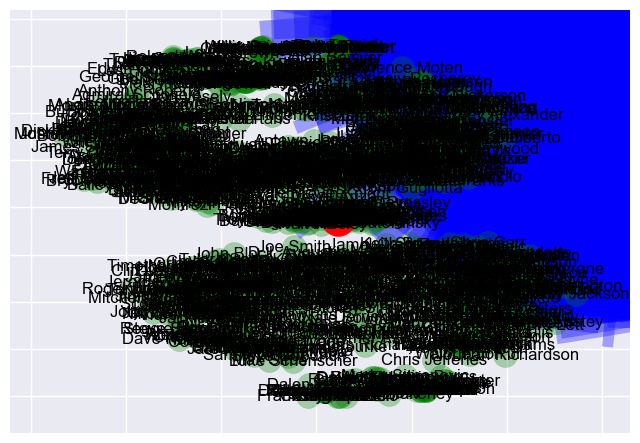

In [79]:
one_season = [(u, v) for (u, v, d) in jordan_network.edges(data=True) if d['weight'] <= 1]
two_three_seasons = [(u, v) for (u, v, d) in jordan_network.edges(data=True) if d['weight']>1 and d['weight']<4]
four_plus_seasons = [(u, v) for (u, v, d) in jordan_network.edges(data=True) if d['weight']>3]

pos = nx.spring_layout(jordan_network, scale=1000000)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(jordan_network, pos, node_size=300, node_color='g', alpha=0.3)
nx.draw_networkx_nodes(jordan_network, pos, nodelist=["Michael Jordan"], node_size=600, node_color='r')

# edges
nx.draw_networkx_edges(jordan_network, pos, edgelist=four_plus_seasons,
                       width=400, edge_color='b', alpha=0.32)
nx.draw_networkx_edges(jordan_network, pos, edgelist=two_three_seasons,
                       width=200, edge_color='b', alpha=0.2)
nx.draw_networkx_edges(jordan_network, pos, edgelist=one_season,
                       width=100, alpha=0.14, edge_color='b', style='dashed')

# labels
nx.draw_networkx_labels(jordan_network, pos, font_size=12, font_weight = 'normal', font_family='sans-serif')

In [73]:
pos

{'Tom Kropp': array([-0.07501516, -0.17673315]),
 'Wilbur Holland': array([-0.7248165 , -0.18210295]),
 'Shaquille Harrison': array([-0.32410389, -0.32872823]),
 'Jay Murphy': array([ 0.44870266, -0.39037856]),
 'Flynn Robinson': array([-0.02011022, -0.02423037]),
 'Jim Cleamons': array([0.19128864, 0.30374226]),
 'John Salley': array([-0.32586038,  0.28720748]),
 'Chet Walker': array([-0.64457375, -0.36772105]),
 'Steve Blake': array([ 0.12699325, -0.04740704]),
 'John Cox': array([0.801117  , 0.15943618]),
 'Jimmy Jones': array([ 0.81120974, -0.07802965]),
 'Jim Ard': array([-0.7272929, -0.0029229]),
 'Cliff Pondexter': array([-1.        , -0.12334602]),
 'Bob Love': array([-0.44903553,  0.1019311 ]),
 'Felipe Lopez': array([0.51452643, 0.31208646]),
 'David Wingate': array([ 0.15185858, -0.15505491]),
 'Othella Harrington': array([-0.33900681,  0.39565018]),
 'Stan McKenzie': array([0.17860983, 0.38161558]),
 'Leon Benbow': array([-0.9899891 ,  0.06415579]),
 'Steve Sheppard': array